In [ ]:
import time
import subprocess
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
lengths=[48,51,54,57,60]
populations=[100,250,500,750,1000]
sizes=[10,50,100]
randoms=[10,25,50,75,100]
list = []
for size in sizes:
    for length in lengths:
        ratio = 0.9
        ancdis = int(ratio*length)
        subprocess.call(["g++","-lm","-O3","SelectDNAII.cpp","stat.cpp"]) 
        for population in populations:
            for random in randoms:
                start = time.time()
                subprocess.call(["./a.out",f'{size}k_NMIX_Mall_{length}.fasta',f'{length}',f'{population}',f'{ancdis}',f'{random}'], stdout=subprocess.PIPE)
                first_line = open(f'best.pcld_{length}').readline().rstrip()
                num = int(first_line.split(" ")[0])
                end = time.time()
                spend = round((end-start),2)
                summary=[size, length, ratio, population, random, num, spend]
                print(summary)
                list.append(summary)
df = pd.DataFrame(list, columns=['size','length','ratio','population','random','num','spend'])

df.to_csv(f'parameter_{ratio}.csv', index=False)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

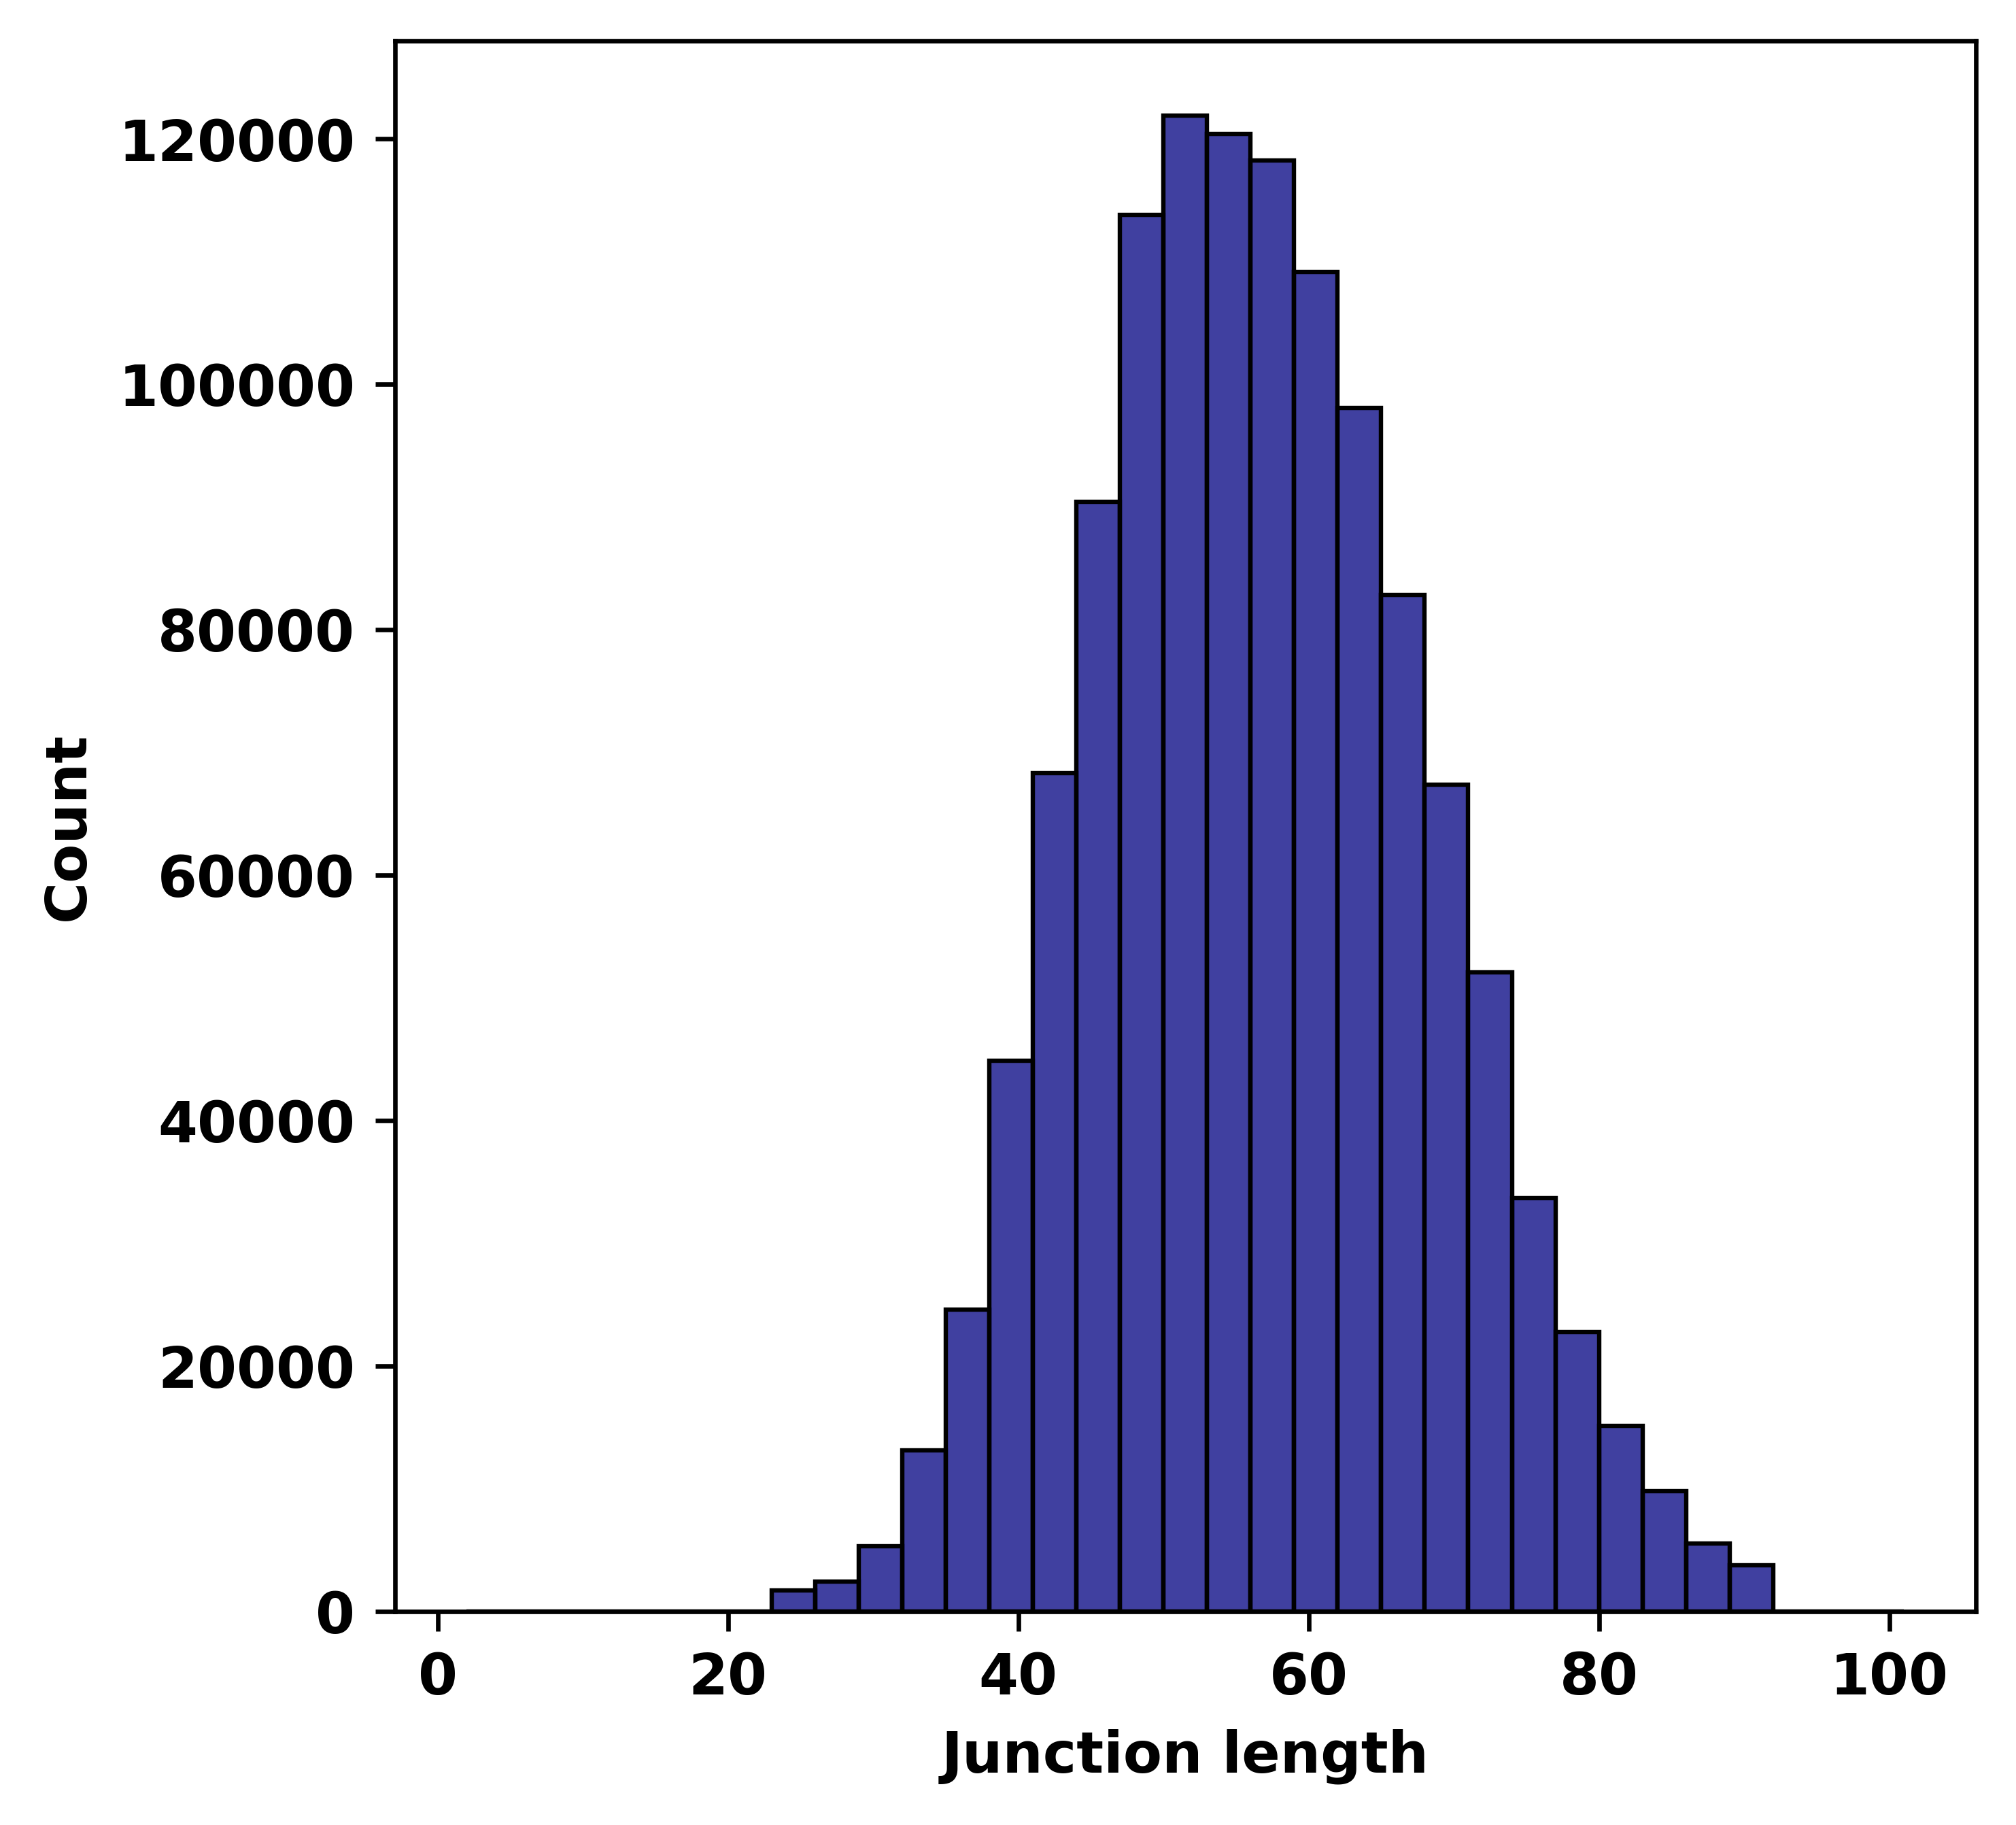

In [4]:
data = pd.read_table("huNMIX_MS-M2_M3_M4_M5_sim-pass.tab", delimiter='\t')
plt.figure(figsize=(5,5),dpi=600)
sns.histplot(data=data, x="junction_length",binwidth=3,color="navy")
plt.xlabel("Junction length",fontweight='bold')
plt.xticks(weight = 'bold')
plt.ylabel("Count",fontweight='bold')
plt.yticks(weight = 'bold')

# plt.title("Counts of non-ambiguous and unique sequence numbers of each CDR3 length in the mix MS simulated data")


In [16]:
data = pd.read_table("parameter_0.5.csv", delimiter=',')
np.log10(data['num'].astype(float))

0      2.136721
1      2.155336
2      2.155336
3      2.143015
4      2.158362
         ...   
370    2.668386
371    2.665581
372    2.673021
373    2.672098
374    2.679428
Name: num, Length: 375, dtype: float64

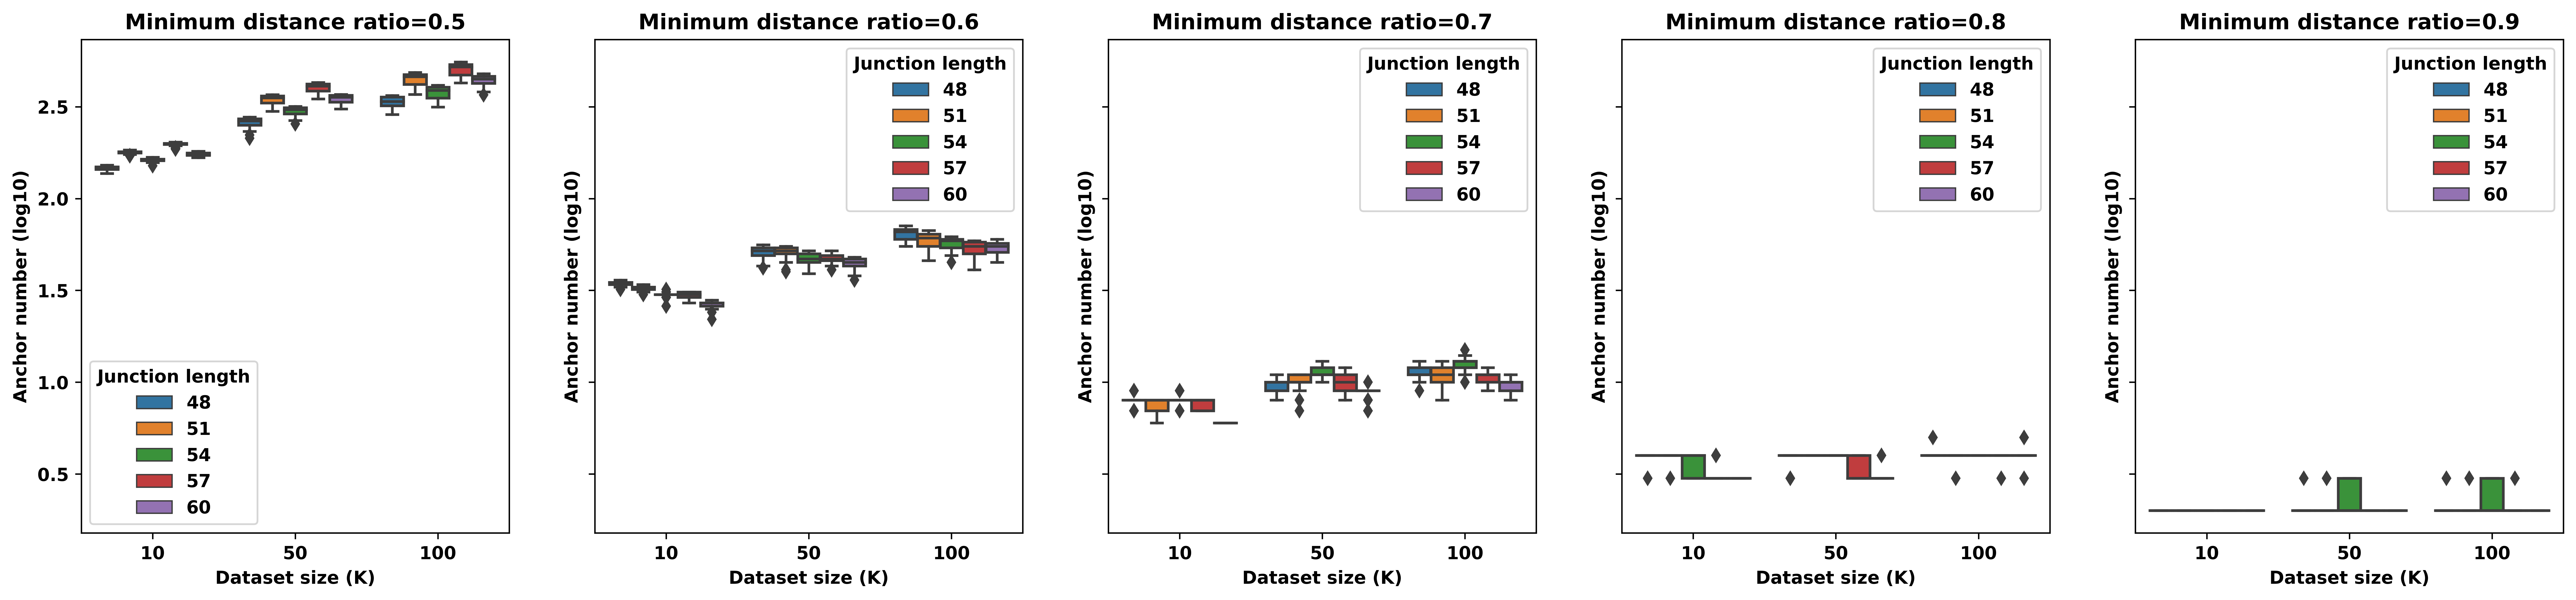

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')



data = pd.read_table("parameter_0.5.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[0], x=data['size'], y = np.log10(data['num'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')

axes[0].set_title("Minimum distance ratio=0.5",fontweight='bold')
axes[0].set_xlabel('Dataset size (K)', fontweight='bold')
axes[0].set_ylabel('Anchor number (log10)', fontweight='bold')

data = pd.read_table("parameter_0.6.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[1], x=data['size'], y = np.log10(data['num']).astype(float),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[1].set_title("Minimum distance ratio=0.6",fontweight='bold')
axes[1].set_xlabel('Dataset size (K)', fontweight='bold')
axes[1].set_ylabel('Anchor number (log10)', fontweight='bold')

data = pd.read_table("parameter_0.7.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[2], x=data['size'], y = np.log10(data['num'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[2].set_title("Minimum distance ratio=0.7",fontweight='bold')
axes[2].set_xlabel('Dataset size (K)', fontweight='bold')
axes[2].set_ylabel('Anchor number (log10)', fontweight='bold')


data = pd.read_table("parameter_0.8.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[3], x=data['size'], y = np.log10(data['num'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[3].set_title("Minimum distance ratio=0.8",fontweight='bold')
axes[3].set_xlabel('Dataset size (K)', fontweight='bold')
axes[3].set_ylabel('Anchor number (log10)', fontweight='bold')


data = pd.read_table("parameter_0.9.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[4], x=data['size'], y = np.log10(data['num'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[4].set_title("Minimum distance ratio=0.9",fontweight='bold')
axes[4].set_xlabel('Dataset size (K)', fontweight='bold')
axes[4].set_ylabel('Anchor number (log10)', fontweight='bold')

for ax in axes:
    set_tick_labels_bold(ax)

plt.show()


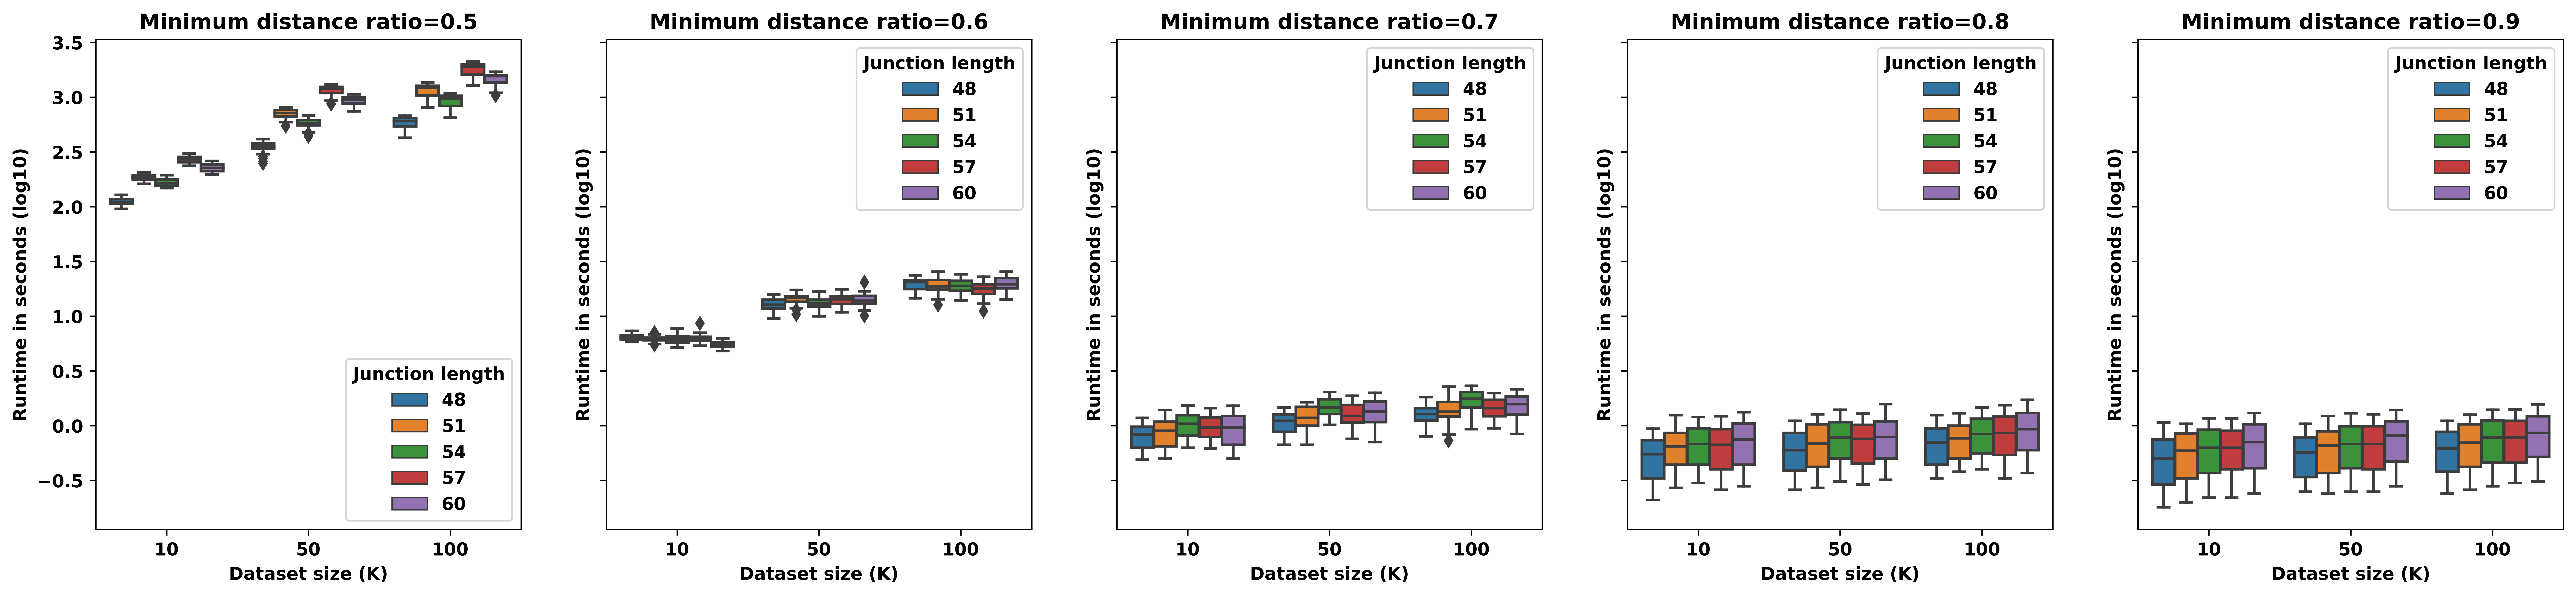

In [34]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)

def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')



data = pd.read_table("parameter_0.5.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[0], x=data['size'], y = np.log10(data['spend'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')

axes[0].set_title("Minimum distance ratio=0.5",fontweight='bold')
axes[0].set_xlabel('Dataset size (K)', fontweight='bold')
axes[0].set_ylabel('Runtime in seconds (log10)', fontweight='bold')


data = pd.read_table("parameter_0.6.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[1], x=data['size'], y = np.log10(data['spend']).astype(float),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[1].set_title("Minimum distance ratio=0.6",fontweight='bold')
axes[1].set_xlabel('Dataset size (K)', fontweight='bold')
axes[1].set_ylabel('Runtime in seconds (log10)', fontweight='bold')

data = pd.read_table("parameter_0.7.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[2], x=data['size'], y = np.log10(data['spend'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[2].set_title("Minimum distance ratio=0.7",fontweight='bold')
axes[2].set_xlabel('Dataset size (K)', fontweight='bold')
axes[2].set_ylabel('Runtime in seconds (log10)', fontweight='bold')

data = pd.read_table("parameter_0.8.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[3], x=data['size'], y = np.log10(data['spend'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[3].set_title("Minimum distance ratio=0.8",fontweight='bold')
axes[3].set_xlabel('Dataset size (K)', fontweight='bold')
axes[3].set_ylabel('Runtime in seconds (log10)', fontweight='bold')


data = pd.read_table("parameter_0.9.csv", delimiter=',')
boxplot=sns.boxplot(ax=axes[4], x=data['size'], y = np.log10(data['spend'].astype(float)),hue = data['length'])
legend = boxplot.legend(title="Junction length")
legend.get_title().set_fontweight('bold')

for text in legend.get_texts():
    text.set_fontweight('bold')
axes[4].set_title("Minimum distance ratio=0.9",fontweight='bold')
axes[4].set_xlabel('Dataset size (K)', fontweight='bold')
axes[4].set_ylabel('Runtime in seconds (log10)', fontweight='bold')

for ax in axes:
    set_tick_labels_bold(ax)

plt.show()




In [35]:
def mean_num(data,size):
    data_new = data[data['size'] == size]
    data_mean = data_new.groupby(['population', 'random'])['num'].mean().round(1)
    table=data_mean.reset_index().pivot("population","random","num")
    return table

/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/fol

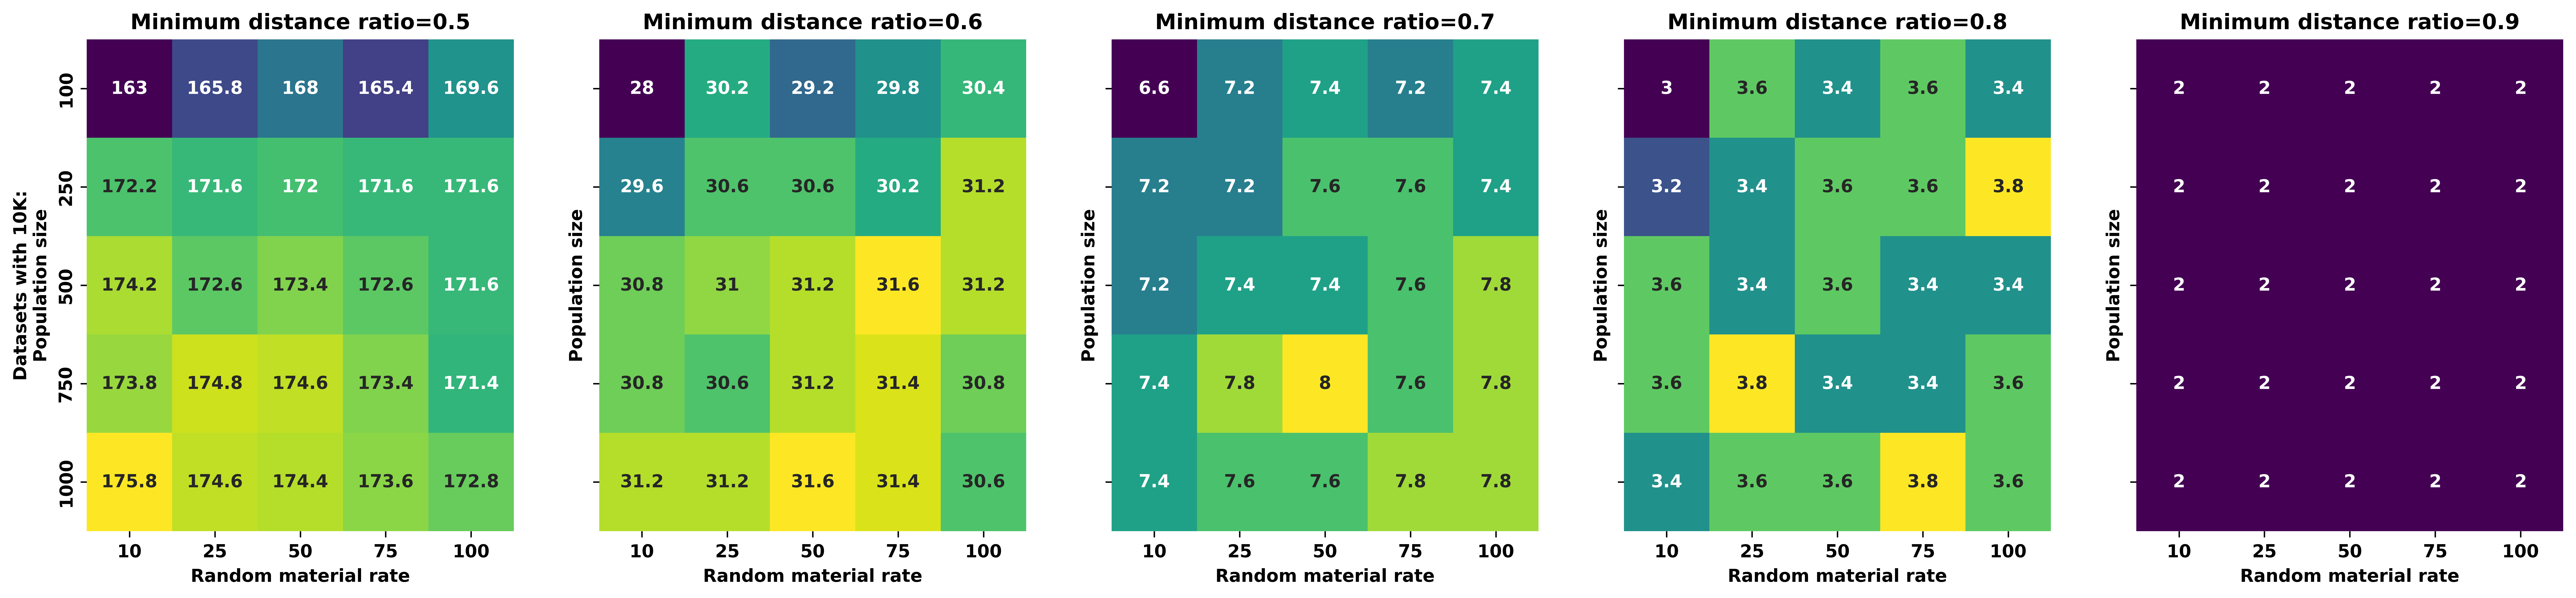

In [37]:

fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
#fig.suptitle('Average anchor number of datasets with 10k under each parameter setting')
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')


data = pd.read_table("parameter_0.5.csv", delimiter=',')
table = mean_num(data,10)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[0],fmt="g",annot_kws={"weight": "bold"})
axes[0].set_title("Minimum distance ratio=0.5",fontweight="bold")
axes[0].set_xlabel('Random material rate', fontweight='bold')
axes[0].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.6.csv", delimiter=',')
table = mean_num(data,10)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[1],fmt="g",annot_kws={"weight": "bold"})
axes[1].set_title("Minimum distance ratio=0.6",fontweight="bold")
axes[1].set_xlabel('Random material rate', fontweight='bold')
axes[1].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.7.csv", delimiter=',')
table=mean_num(data,10)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[2],fmt="g",annot_kws={"weight": "bold"})
axes[2].set_title("Minimum distance ratio=0.7",fontweight="bold")
axes[2].set_xlabel('Random material rate', fontweight='bold')
axes[2].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.8.csv", delimiter=',')
table=mean_num(data,10)
sns.heatmap(table,annot=True, cmap="viridis",cbar=False,ax=axes[3],fmt="g",annot_kws={"weight": "bold"})
axes[3].set_title("Minimum distance ratio=0.8",fontweight="bold")
axes[3].set_xlabel('Random material rate', fontweight='bold')
axes[3].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.9.csv", delimiter=',')
table=mean_num(data,10)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[4],fmt="g",annot_kws={"weight": "bold"})
axes[4].set_title("Minimum distance ratio=0.9",fontweight="bold")
axes[4].set_xlabel('Random material rate', fontweight='bold')
axes[4].set_ylabel('Population size', fontweight='bold')


plt.setp(axes[0:5,], xlabel='Random material rate')
plt.setp(axes[0:5], ylabel='Population size')

axes[0].set_ylabel('Datasets with 10K:\nPopulation size', fontweight="bold")

for ax in axes:
    set_tick_labels_bold(ax)

plt.show()


/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/fol

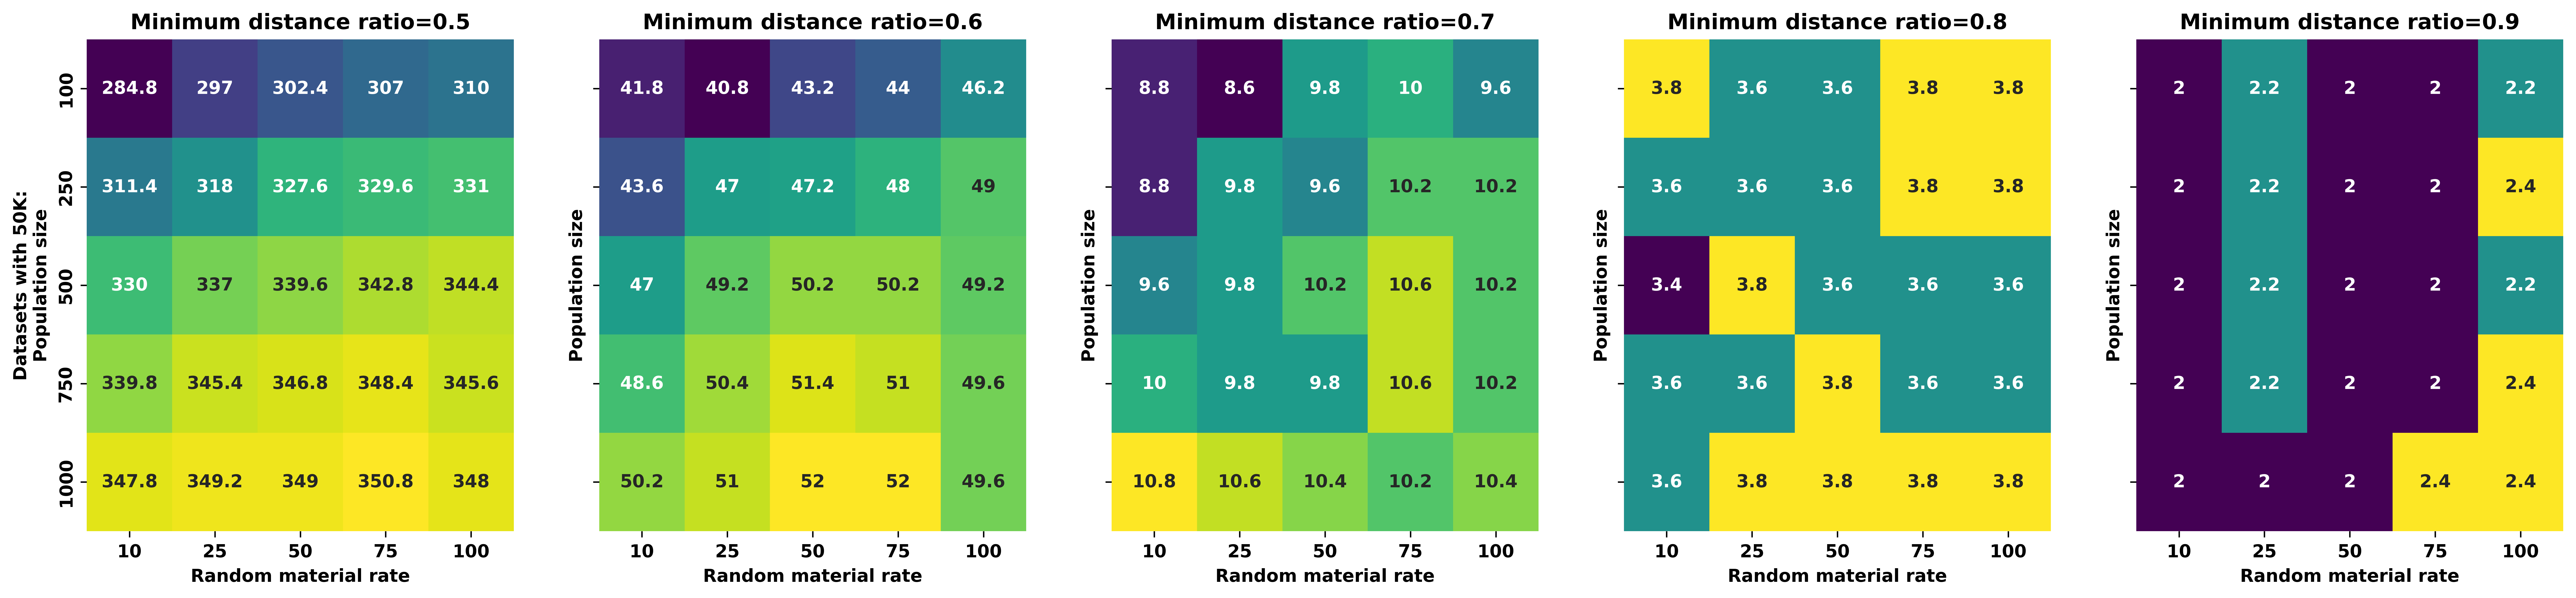

In [42]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
#fig.suptitle('Average anchor number of datasets with 10k under each parameter setting')
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

data = pd.read_table("parameter_0.5.csv", delimiter=',')
table = mean_num(data,50)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[0],fmt="g",annot_kws={"weight": "bold"})
axes[0].set_title("Minimum distance ratio=0.5",fontweight="bold")
axes[0].set_xlabel('Random material rate', fontweight='bold')
axes[0].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.6.csv", delimiter=',')
table = mean_num(data,50)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[1],fmt="g",annot_kws={"weight": "bold"})
axes[1].set_title("Minimum distance ratio=0.6",fontweight="bold")
axes[1].set_xlabel('Random material rate', fontweight='bold')
axes[1].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.7.csv", delimiter=',')
table=mean_num(data,50)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[2],fmt="g",annot_kws={"weight": "bold"})
axes[2].set_title("Minimum distance ratio=0.7",fontweight="bold")
axes[2].set_xlabel('Random material rate', fontweight='bold')
axes[2].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.8.csv", delimiter=',')
table=mean_num(data,50)
sns.heatmap(table,annot=True, cmap="viridis",cbar=False,ax=axes[3],fmt="g",annot_kws={"weight": "bold"})
axes[3].set_title("Minimum distance ratio=0.8",fontweight="bold")
axes[3].set_xlabel('Random material rate', fontweight='bold')
axes[3].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.9.csv", delimiter=',')
table=mean_num(data,50)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[4],fmt="g",annot_kws={"weight": "bold"})
axes[4].set_title("Minimum distance ratio=0.9",fontweight="bold")
axes[4].set_xlabel('Random material rate', fontweight='bold')
axes[4].set_ylabel('Population size', fontweight='bold')


plt.setp(axes[0:5,], xlabel='Random material rate')
plt.setp(axes[0:5], ylabel='Population size')

axes[0].set_ylabel('Datasets with 50K:\nPopulation size', fontweight="bold")

for ax in axes:
    set_tick_labels_bold(ax)

plt.show()

/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/2426742666.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_mean.reset_index().pivot("population","random","num")
/var/fol

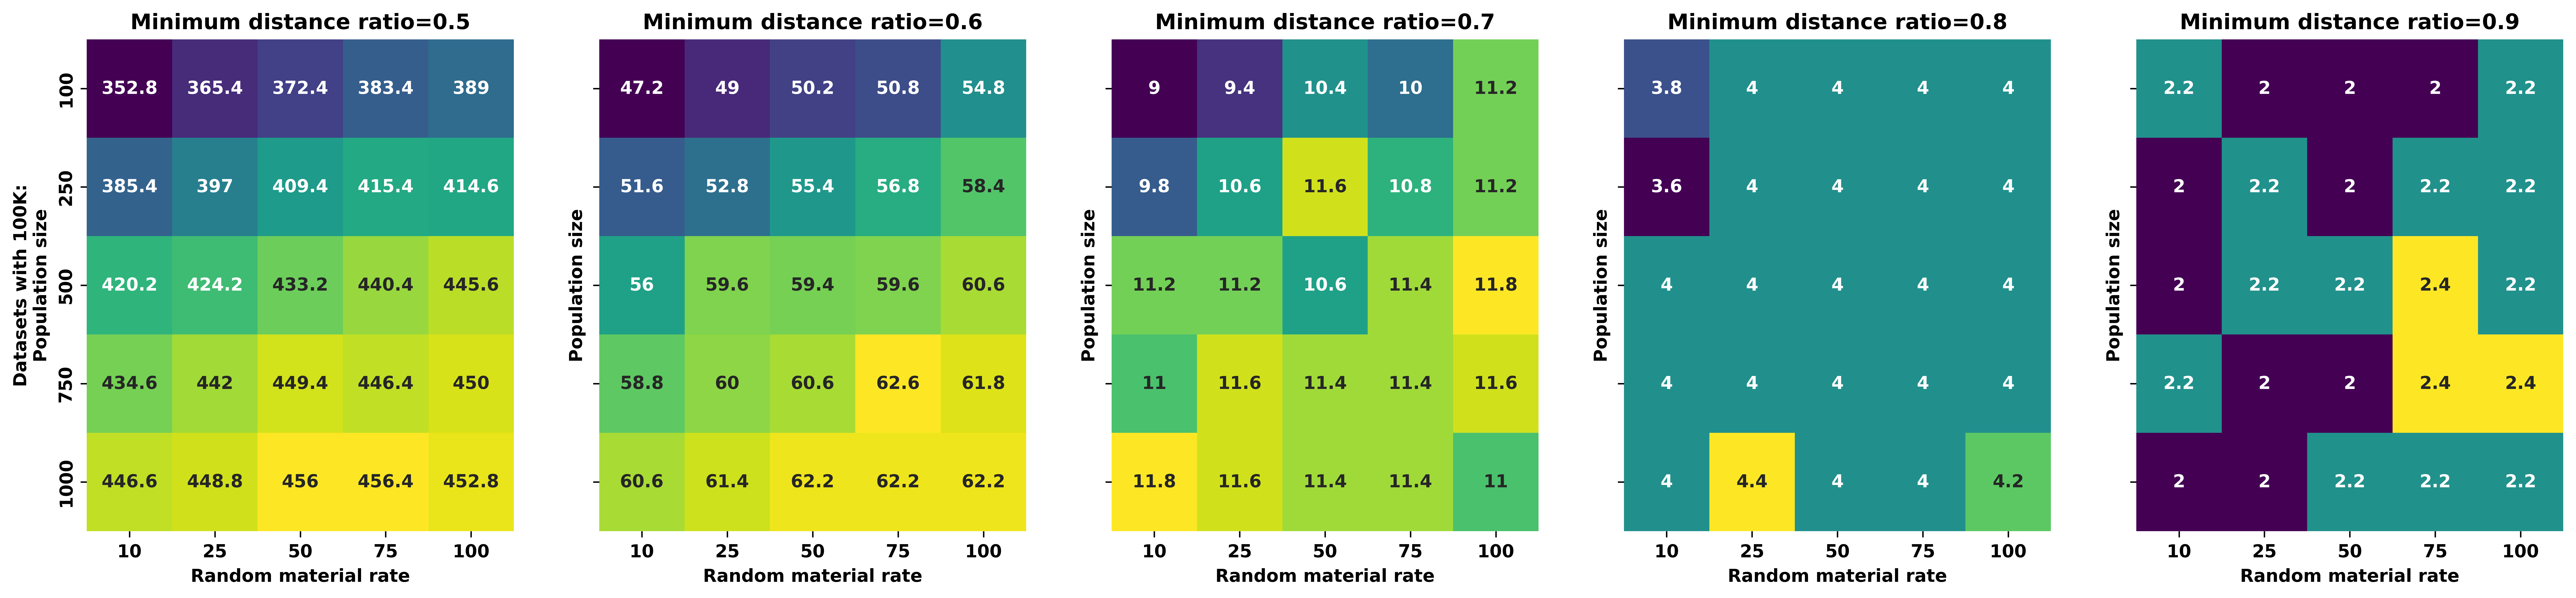

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
#fig.suptitle('Average anchor number of datasets with 10k under each parameter setting')
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        
data = pd.read_table("parameter_0.5.csv", delimiter=',')
table = mean_num(data,100)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[0],fmt="g",annot_kws={"weight": "bold"})
axes[0].set_title("Minimum distance ratio=0.5",fontweight="bold")
axes[0].set_xlabel('Random material rate', fontweight='bold')
axes[0].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.6.csv", delimiter=',')
table = mean_num(data,100)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[1],fmt="g",annot_kws={"weight": "bold"})
axes[1].set_title("Minimum distance ratio=0.6",fontweight="bold")
axes[1].set_xlabel('Random material rate', fontweight='bold')
axes[1].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.7.csv", delimiter=',')
table=mean_num(data,100)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[2],fmt="g",annot_kws={"weight": "bold"})
axes[2].set_title("Minimum distance ratio=0.7",fontweight="bold")
axes[2].set_xlabel('Random material rate', fontweight='bold')
axes[2].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.8.csv", delimiter=',')
table=mean_num(data,100)
sns.heatmap(table,annot=True, cmap="viridis",cbar=False,ax=axes[3],fmt="g",annot_kws={"weight": "bold"})
axes[3].set_title("Minimum distance ratio=0.8",fontweight="bold")
axes[3].set_xlabel('Random material rate', fontweight='bold')
axes[3].set_ylabel('Population size', fontweight='bold')

data = pd.read_table("parameter_0.9.csv", delimiter=',')
table=mean_num(data,100)
sns.heatmap(table, annot=True, cmap="viridis",cbar=False,ax=axes[4],fmt="g",annot_kws={"weight": "bold"})
axes[4].set_title("Minimum distance ratio=0.9",fontweight="bold")
axes[4].set_xlabel('Random material rate', fontweight='bold')
axes[4].set_ylabel('Population size', fontweight='bold')


plt.setp(axes[0:5,], xlabel='Random material rate')
plt.setp(axes[0:5], ylabel='Population size')

axes[0].set_ylabel('Datasets with 100K:\nPopulation size', fontweight="bold")
for ax in axes:
    set_tick_labels_bold(ax)

plt.show()

In [15]:
def mean_spend(data,size):
    data_new=data[data['size'] == size]
    data_spend = data_new.groupby(['population', 'random'])['spend'].mean().round(1)
    table=data_spend.reset_index().pivot("population","random","spend")
    return table

/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spen

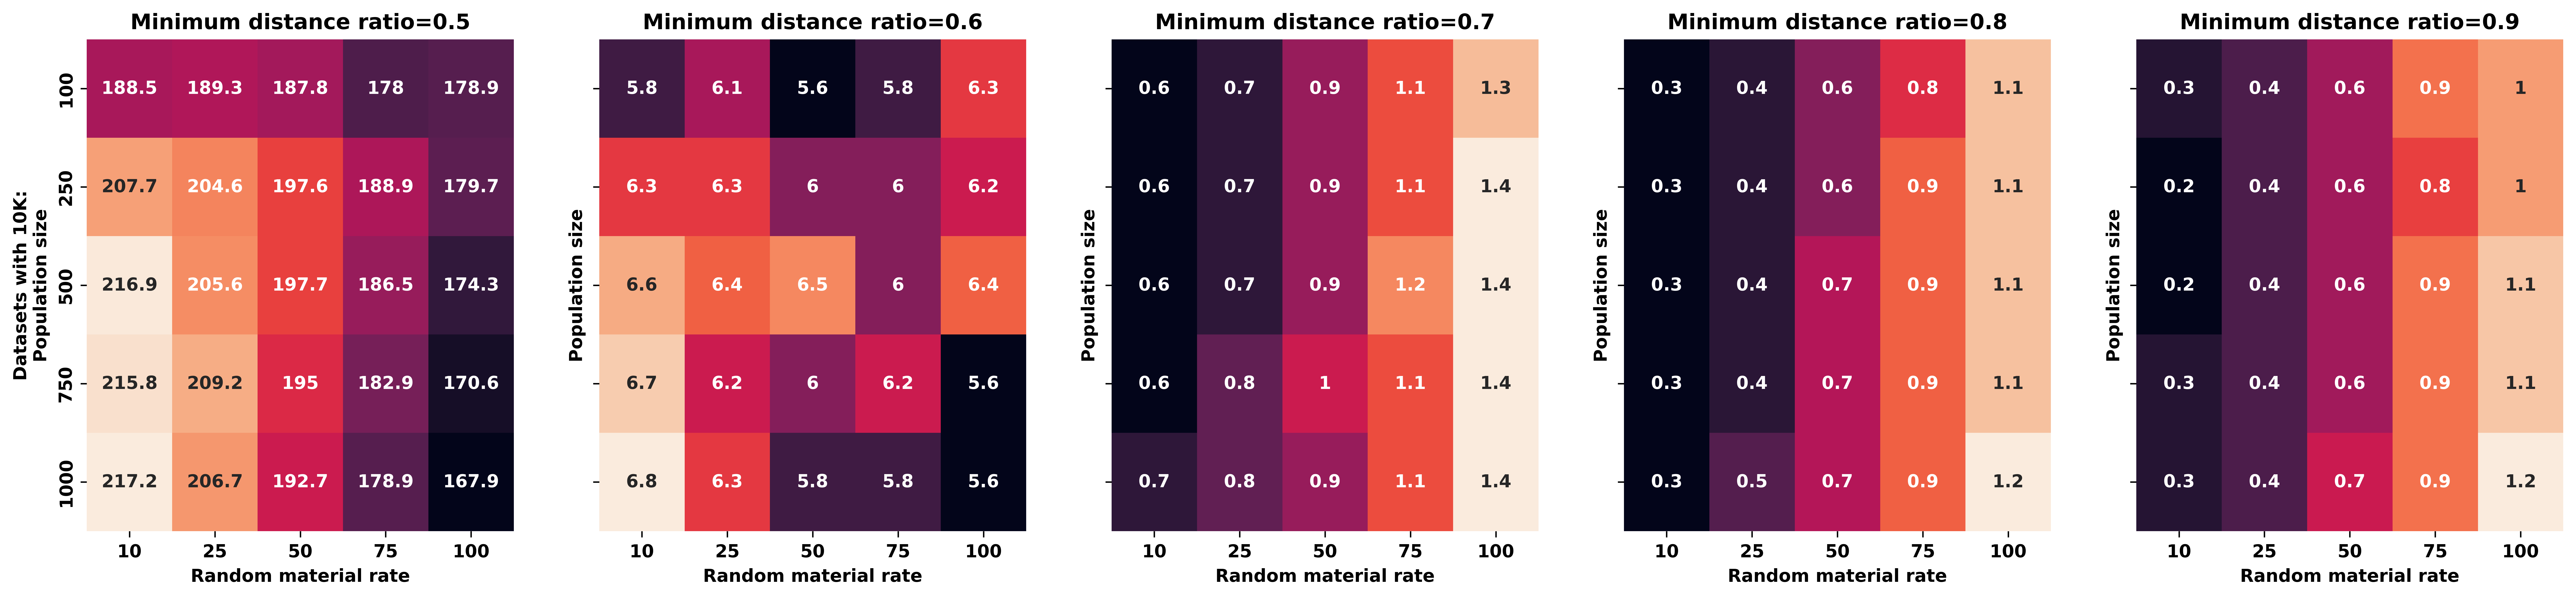

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Load the data for the heatmaps
data1 = pd.read_table("parameter_0.5.csv", delimiter=',')
data2 = pd.read_table("parameter_0.6.csv", delimiter=',')
data3 = pd.read_table("parameter_0.7.csv", delimiter=',')
data4 = pd.read_table("parameter_0.8.csv", delimiter=',')
data5 = pd.read_table("parameter_0.9.csv", delimiter=',')

# Calculate the mean spend for each dataset
table1 = mean_spend(data1, 10)
table2 = mean_spend(data2, 10)
table3 = mean_spend(data3, 10)
table4 = mean_spend(data4, 10)
table5 = mean_spend(data5, 10)

# Create a figure with five subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# Plot the heatmaps
sns.heatmap(table1, annot=True, cbar=False,ax=axes[0],fmt="g",annot_kws={"weight": "bold"})
axes[0].set_title("Minimum distance ratio=0.5",fontweight='bold')
axes[0].set_xlabel('Random material rate', fontweight='bold')
axes[0].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table2, annot=True, cbar=False,ax=axes[1],fmt="g",annot_kws={"weight": "bold"})
axes[1].set_title("Minimum distance ratio=0.6",fontweight='bold')
axes[1].set_xlabel('Random material rate', fontweight='bold')
axes[1].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table3, annot=True, cbar=False,ax=axes[2],fmt="g",annot_kws={"weight": "bold"})
axes[2].set_title("Minimum distance ratio=0.7",fontweight='bold')
axes[2].set_xlabel('Random material rate', fontweight='bold')
axes[2].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table4, annot=True, cbar=False,ax=axes[3],fmt="g",annot_kws={"weight": "bold"})
axes[3].set_title("Minimum distance ratio=0.8",fontweight='bold')
axes[3].set_xlabel('Random material rate', fontweight='bold')
axes[3].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table5, annot=True, cbar=False,ax=axes[4],fmt="g",annot_kws={"weight": "bold"})
axes[4].set_title("Minimum distance ratio=0.9",fontweight='bold')
axes[4].set_xlabel('Random material rate', fontweight='bold')
axes[4].set_ylabel('Population size', fontweight='bold')

# plt.setp(axes[0:5,], xlabel='Random material rate')
# plt.setp(axes[0:5], ylabel='Population size')

axes[0].set_ylabel('Datasets with 10K:\nPopulation size',fontweight="bold")
for ax in axes:
    set_tick_labels_bold(ax)

plt.show()


/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spen

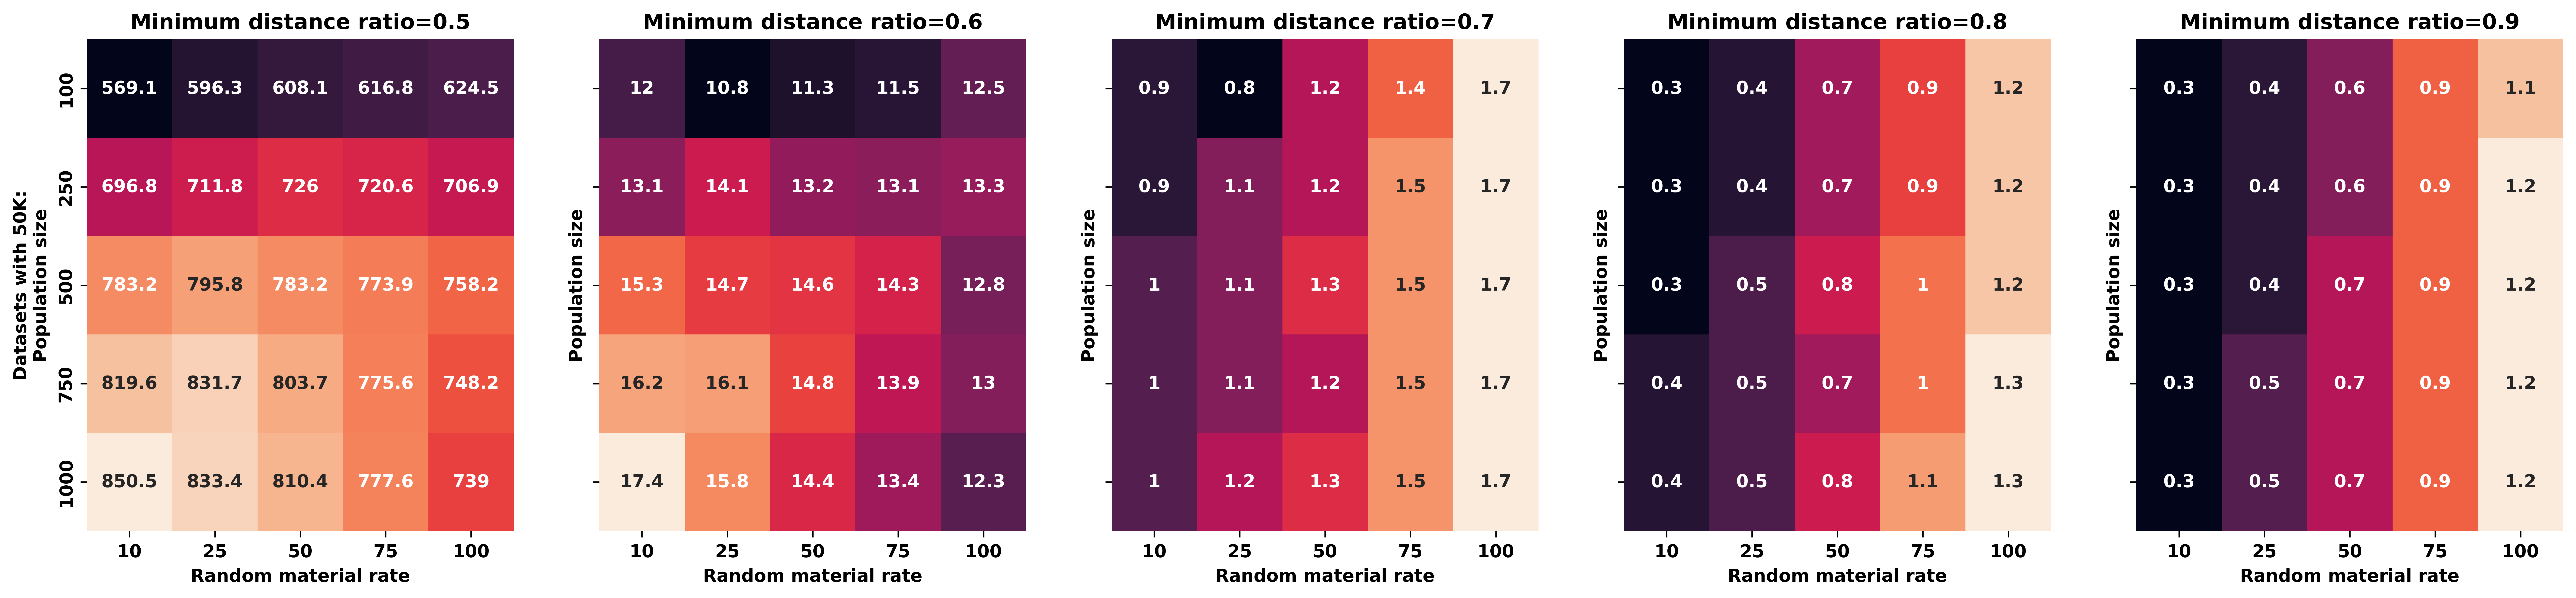

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Load the data for the heatmaps
data1 = pd.read_table("parameter_0.5.csv", delimiter=',')
data2 = pd.read_table("parameter_0.6.csv", delimiter=',')
data3 = pd.read_table("parameter_0.7.csv", delimiter=',')
data4 = pd.read_table("parameter_0.8.csv", delimiter=',')
data5 = pd.read_table("parameter_0.9.csv", delimiter=',')


# Calculate the mean spend for each dataset
table1 = mean_spend(data1, 50)
table2 = mean_spend(data2, 50)
table3 = mean_spend(data3, 50)
table4 = mean_spend(data4, 50)
table5 = mean_spend(data5, 50)

# Create a figure with five subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# Plot the heatmaps
sns.heatmap(table1, annot=True, cbar=False,ax=axes[0],fmt="g",annot_kws={"weight": "bold"})
axes[0].set_title("Minimum distance ratio=0.5",fontweight='bold')
axes[0].set_xlabel('Random material rate', fontweight='bold')
axes[0].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table2, annot=True, cbar=False,ax=axes[1],fmt="g",annot_kws={"weight": "bold"})
axes[1].set_title("Minimum distance ratio=0.6",fontweight='bold')
axes[1].set_xlabel('Random material rate', fontweight='bold')
axes[1].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table3, annot=True, cbar=False,ax=axes[2],fmt="g",annot_kws={"weight": "bold"})
axes[2].set_title("Minimum distance ratio=0.7",fontweight='bold')
axes[2].set_xlabel('Random material rate', fontweight='bold')
axes[2].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table4, annot=True, cbar=False,ax=axes[3],fmt="g",annot_kws={"weight": "bold"})
axes[3].set_title("Minimum distance ratio=0.8",fontweight='bold')
axes[3].set_xlabel('Random material rate', fontweight='bold')
axes[3].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table5, annot=True, cbar=False,ax=axes[4],fmt="g",annot_kws={"weight": "bold"})
axes[4].set_title("Minimum distance ratio=0.9",fontweight='bold')
axes[4].set_xlabel('Random material rate', fontweight='bold')
axes[4].set_ylabel('Population size', fontweight='bold')

# plt.setp(axes[0:5,], xlabel='Random material rate')
# plt.setp(axes[0:5], ylabel='Population size')

axes[0].set_ylabel('Datasets with 50K:\nPopulation size',fontweight="bold")
for ax in axes:
    set_tick_labels_bold(ax)

plt.show()




/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spend")
/var/folders/mv/txgkrc8n2zdbn_bz0s7779w40000gn/T/ipykernel_5221/3795310446.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table=data_spend.reset_index().pivot("population","random","spen

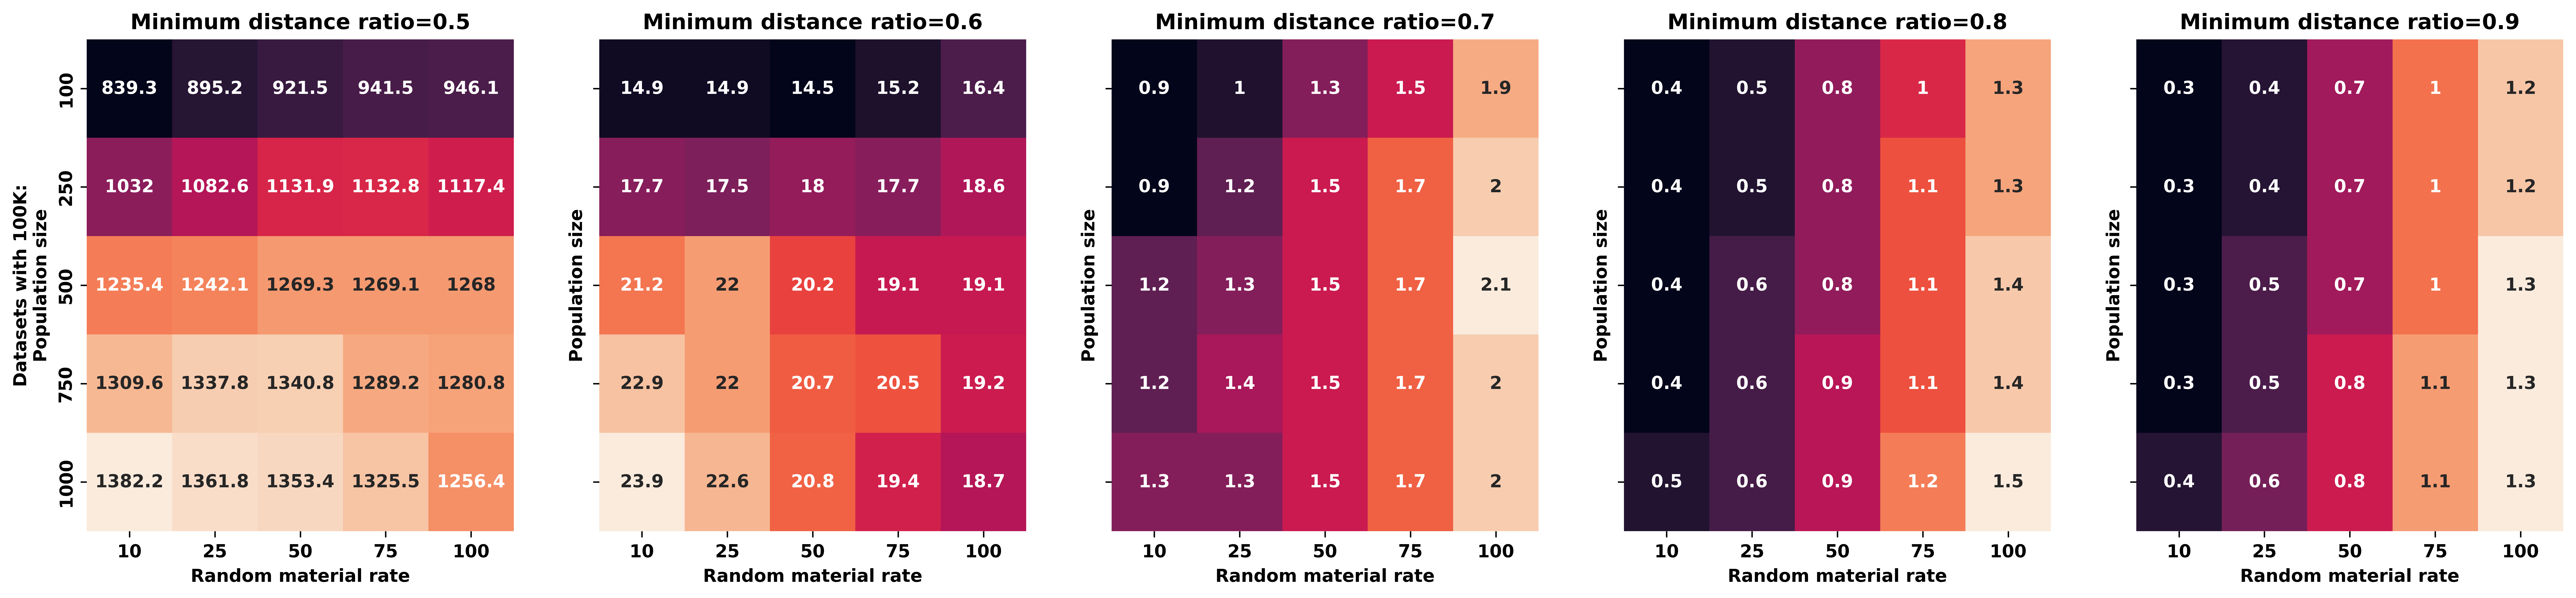

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Load the data for the heatmaps
data1 = pd.read_table("parameter_0.5.csv", delimiter=',')
data2 = pd.read_table("parameter_0.6.csv", delimiter=',')
data3 = pd.read_table("parameter_0.7.csv", delimiter=',')
data4 = pd.read_table("parameter_0.8.csv", delimiter=',')
data5 = pd.read_table("parameter_0.9.csv", delimiter=',')

# Calculate the mean spend for each dataset
table1 = mean_spend(data1, 100)
table2 = mean_spend(data2, 100)
table3 = mean_spend(data3, 100)
table4 = mean_spend(data4, 100)
table5 = mean_spend(data5, 100)


# Create a figure with five subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, dpi=600)
def set_tick_labels_bold(ax):
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# Plot the heatmaps
sns.heatmap(table1, annot=True, cbar=False,ax=axes[0],fmt="g",annot_kws={"weight": "bold"})
axes[0].set_title("Minimum distance ratio=0.5",fontweight='bold')
axes[0].set_xlabel('Random material rate', fontweight='bold')
axes[0].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table2, annot=True, cbar=False,ax=axes[1],fmt="g",annot_kws={"weight": "bold"})
axes[1].set_title("Minimum distance ratio=0.6",fontweight='bold')
axes[1].set_xlabel('Random material rate', fontweight='bold')
axes[1].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table3, annot=True, cbar=False,ax=axes[2],fmt="g",annot_kws={"weight": "bold"})
axes[2].set_title("Minimum distance ratio=0.7",fontweight='bold')
axes[2].set_xlabel('Random material rate', fontweight='bold')
axes[2].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table4, annot=True, cbar=False,ax=axes[3],fmt="g",annot_kws={"weight": "bold"})
axes[3].set_title("Minimum distance ratio=0.8",fontweight='bold')
axes[3].set_xlabel('Random material rate', fontweight='bold')
axes[3].set_ylabel('Population size', fontweight='bold')

sns.heatmap(table5, annot=True, cbar=False,ax=axes[4],fmt="g",annot_kws={"weight": "bold"})
axes[4].set_title("Minimum distance ratio=0.9",fontweight='bold')
axes[4].set_xlabel('Random material rate', fontweight='bold')
axes[4].set_ylabel('Population size', fontweight='bold')

# plt.setp(axes[0:5,], xlabel='Random material rate')
# plt.setp(axes[0:5], ylabel='Population size')

axes[0].set_ylabel('Datasets with 100K:\nPopulation size',fontweight="bold")
for ax in axes:
    set_tick_labels_bold(ax)

plt.show()







